<a href="https://colab.research.google.com/github/airfanrmdhn/13929-bk-webdeveloper/blob/main/capstoneBK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. pengumpulan data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/water_potability.csv')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


2. menelaah data

In [ ]:
#tampilan informasi data
print('Dataset Information:')
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#tampilan deskripsi data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#tampilan uniqe
df.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [ ]:
#tampilan tipe data
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


3. visualisasi & validasi data

In [ ]:
#cek missing value
missing_values = df.isnull().sum()
print("Missing Values :\n", missing_values)

Missing Values :
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [88]:
df.fillna(df.mean(), inplace=True)

In [89]:
#isi numerik dengan mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [90]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  #pemisahkan kolom dalam dataset

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th)
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th]
    #kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values)
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th]
    #kolom kategorikal dengan unique values > car_th (high cardinality)

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi : {dataframe.shape[0]}")
    print(f"Jumlah variabel : {dataframe.shape[1]}")
    print(f"Kolom kategorikal : {len(cat_cols)}")
    print(f"Kolom Numerik : {len(num_cols)}")
    print(f"Kategori tapi kardinal : {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal : {len(num_but_cat)}")

    #pengembalian daftar kolom yang dikelompokkan berdasarkan tipe
    return cat_cols, num_cols, cat_but_car

In [91]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Jumlah observasi : 3276
Jumlah variabel : 10
Kolom kategorikal : 1
Kolom Numerik : 9
Kategori tapi kardinal : 0
Numerik tapi kategorikal : 1


In [96]:
#buat visualisasi boxplot untuk semua kolom numerik
def boxplot(dataframe, numeric_columns):

    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4
    #menghitung jumlah baris
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows))
    #membuat grid subplots

    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col])
        #iterasi Kolom numerik untuk membuat boxplot
        axes[row, col].set_title(f'boxplot dari {column}')
        axes[row, col].set_ylabel(column)

    #penentuan posisi subplot pada grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
        #menghapus Grafik Kosong

    #penyesuaian Layout
    plt.tight_layout()
    plt.show()


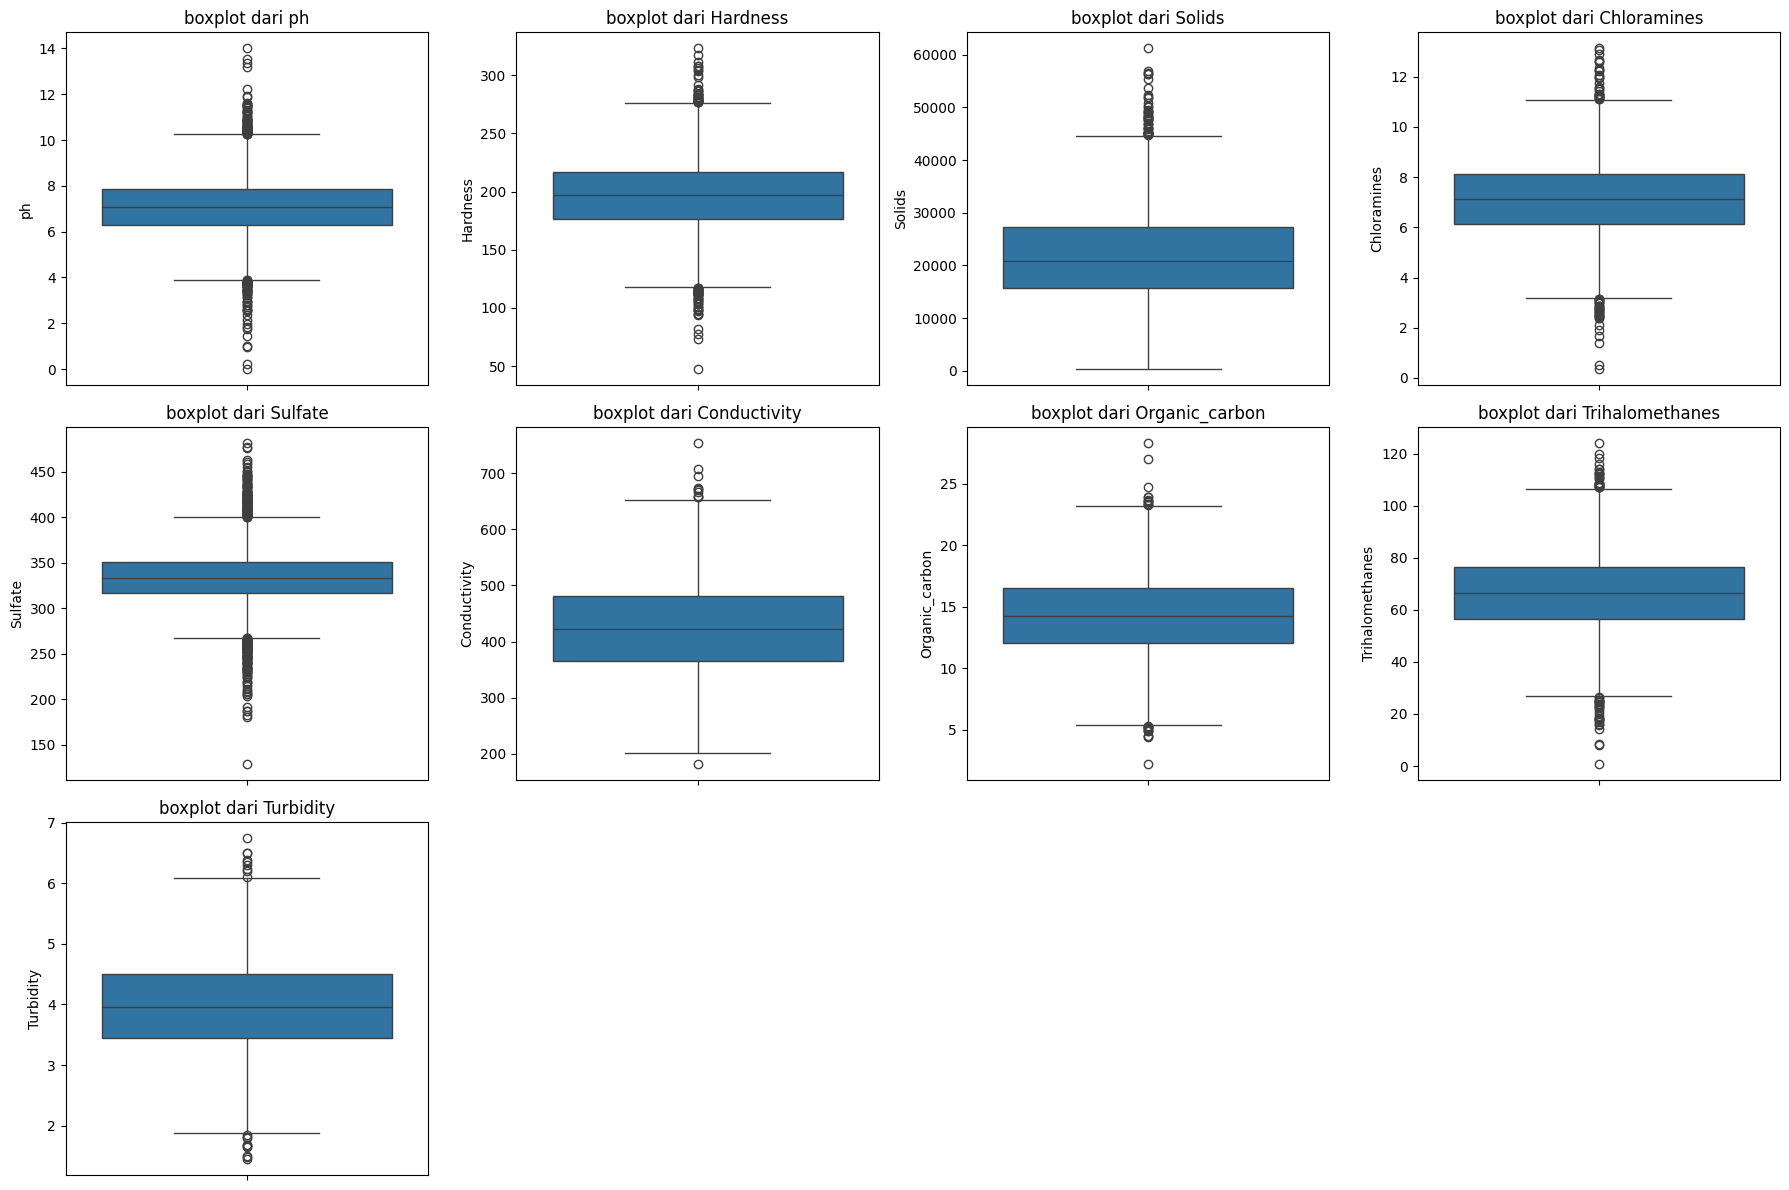

In [97]:
boxplot(df, num_cols)

In [98]:
def detect_outlier_iqr_all_columns(df):

    outliers_dict = {}

    #looping untuk setiap kolom numerik
    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        #mengambil data dari kolom dan menghapus nilai yang hilang
        data_sorted = sorted(data)
        #mengurutkan data untuk menghitung kuantil

        #menghitung Q1, Q3, dan IQR
        q1 = np.percentile(data_sorted, 25)
        q3 = np.percentile(data_sorted, 75)
        IQR = q3 - q1

        #menentukan batas bawah dan atas untuk outlier
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        #mencari outlier dan menyimpannya ke list
        outliers = [i for i in data_sorted if i < lwr_bound or i > upr_bound]

        #apabila ada outlier, tambahkan ke kamus outliers_dict
        if outliers:
            outliers_dict[col] = outliers

    return outliers_dict

In [99]:
outliers_found = detect_outlier_iqr_all_columns(df)

for col, outliers in outliers_found.items():
    print(f"Outliers dalam {col}  (total: {len(outliers)})")

Outliers dalam ph  (total: 142)
Outliers dalam Hardness  (total: 83)
Outliers dalam Solids  (total: 47)
Outliers dalam Chloramines  (total: 61)
Outliers dalam Sulfate  (total: 264)
Outliers dalam Conductivity  (total: 11)
Outliers dalam Organic_carbon  (total: 25)
Outliers dalam Trihalomethanes  (total: 54)
Outliers dalam Turbidity  (total: 19)


In [100]:
from imblearn.over_sampling import SMOTE

X = df.drop('Potability', axis=1)
#fitur
y = df['Potability']
#target

smote = SMOTE(random_state=42)
#inisialisasi smote dengan random state
X_resampled, y_resampled = smote.fit_resample(X, y)
#resampling data

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Potability'] = y_resampled

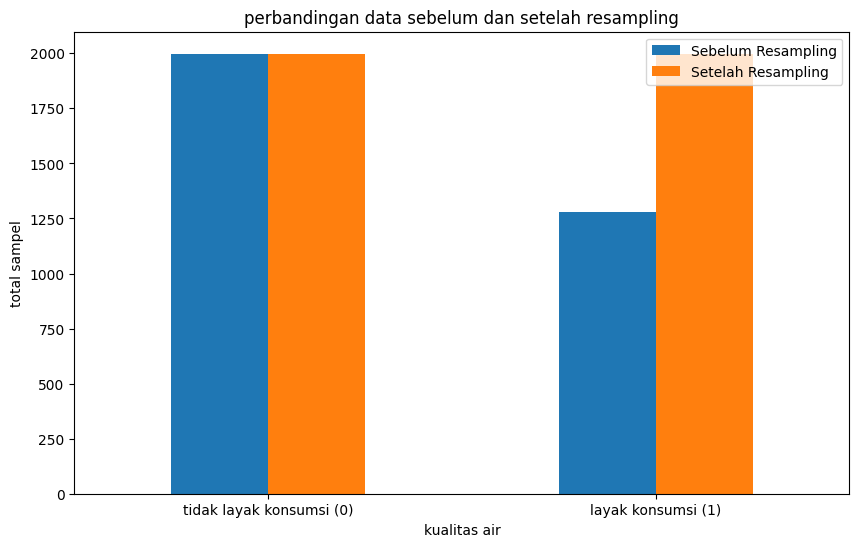

In [101]:
#sebelum resampling
before_resampling = df['Potability'].value_counts()

#setelah resampling
after_resampling = resampled_data['Potability'].value_counts()


comparison_df = pd.DataFrame({
    'Sebelum Resampling': before_resampling,
    'Setelah Resampling': after_resampling
})
comparison_df.index = ['tidak layak konsumsi (0)', 'layak konsumsi (1)']


comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('perbandingan data sebelum dan setelah resampling')
plt.xlabel('kualitas air')
plt.ylabel('total sampel')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

4. menentukan objek

In [102]:
from sklearn.model_selection import train_test_split


#fitur (X)
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

#target (y)
y = df['Potability']


#pembagian data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. membersihkan data

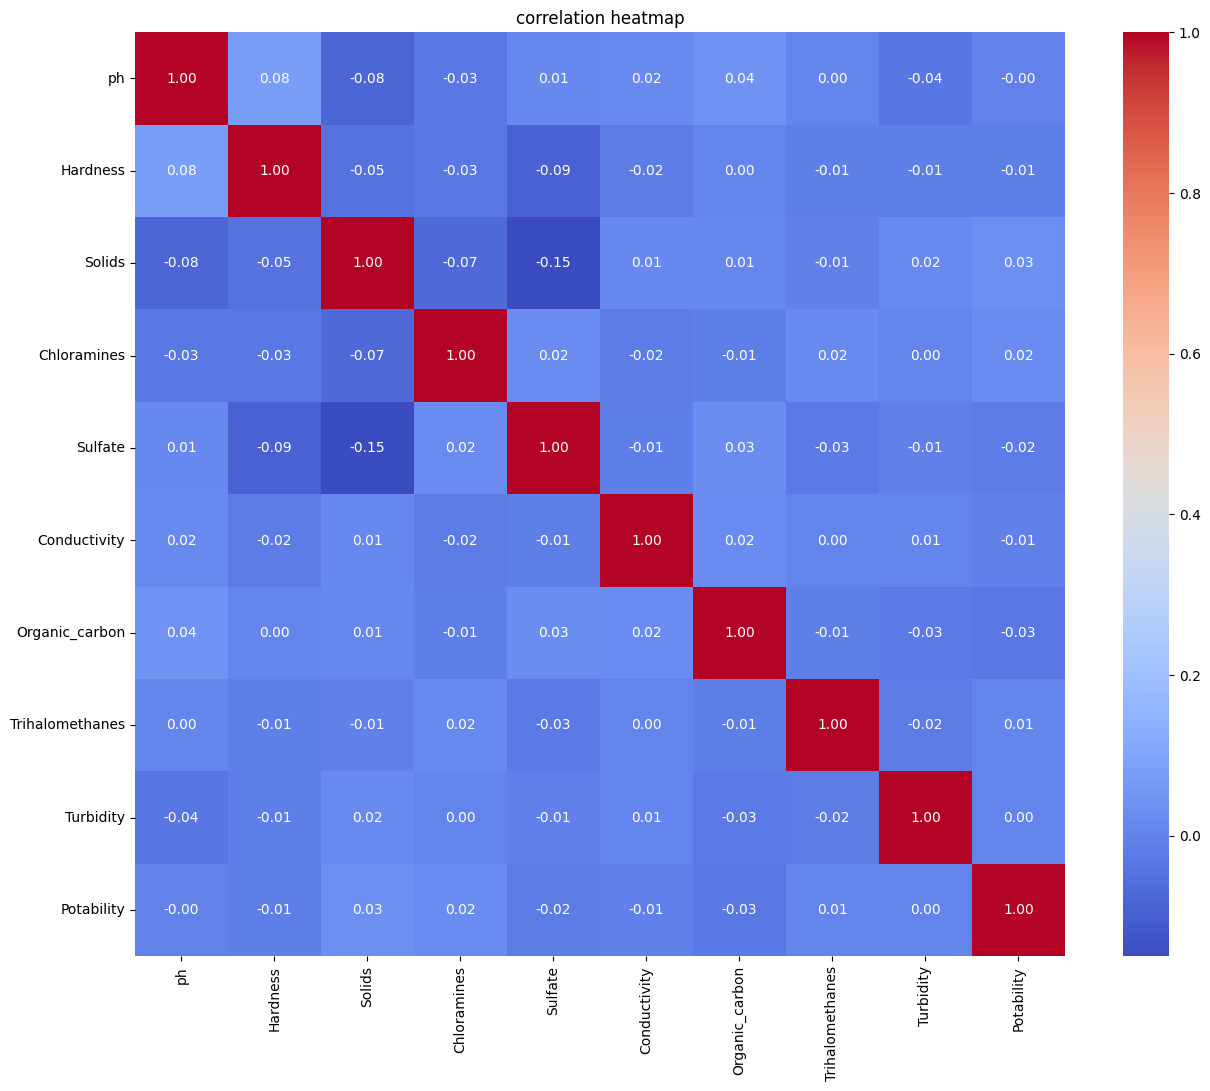

In [103]:
#penghitungan matriks korelasi
correlation = df.corr()

#pembuatan heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation heatmap')
plt.show()

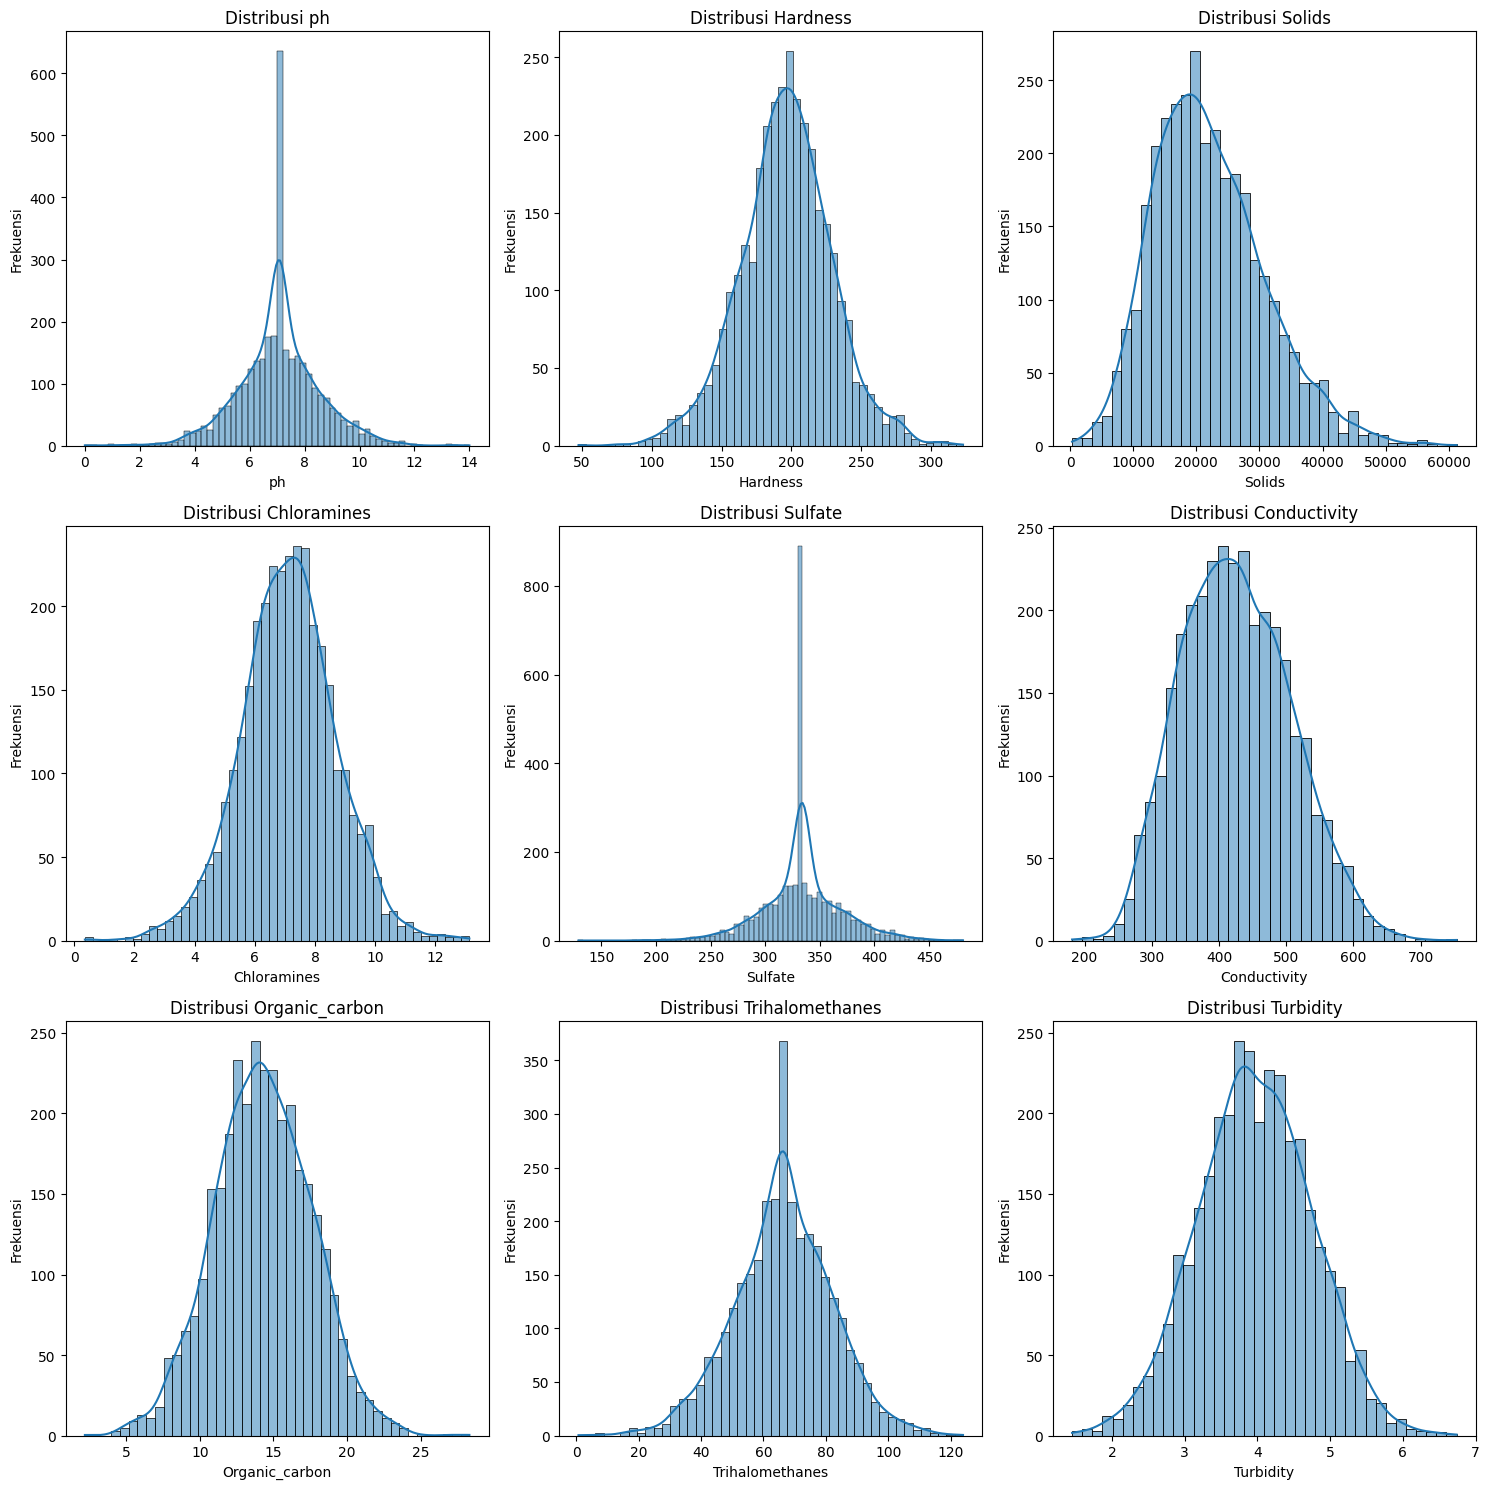

In [104]:
#fitur yang akan divisualisasi
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 baris, 3 kolom

#flatten axes untuk iterasi
axes = axes.flatten()

#loop melalui setiap fitur dan buat histogram di subplot
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')


plt.tight_layout()
plt.show()

7. pemodelan

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


clean_classifier_nb = GaussianNB()
clean_classifier_nb .fit(X_train, y_train)

GaussianNB()

In [106]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt .fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf .fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [109]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [113]:
y_pred_nb = clean_classifier_nb.predict(X_test)

#evaluate naive bayes model
print("\nNaive Bayes Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model:
Accuracy: 0.631
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656



In [111]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.631, 'recall': 0.631, 'F1 score': 0.584, 'Precision score': 0.6}


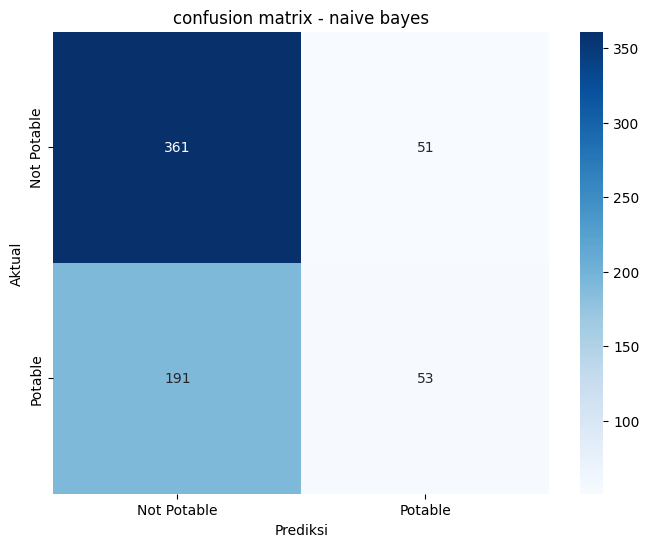

In [114]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

#membuat visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.title("confusion matrix - naive bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [115]:
y_pred_dt = clean_classifier_dt.predict(X_test)

#evaluate random forest model
print("\nRandom Forest Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Random Forest Model:
Accuracy: 0.578
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



In [116]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.578, 'recall': 0.578, 'F1 score': 0.583, 'Precision score': 0.591}


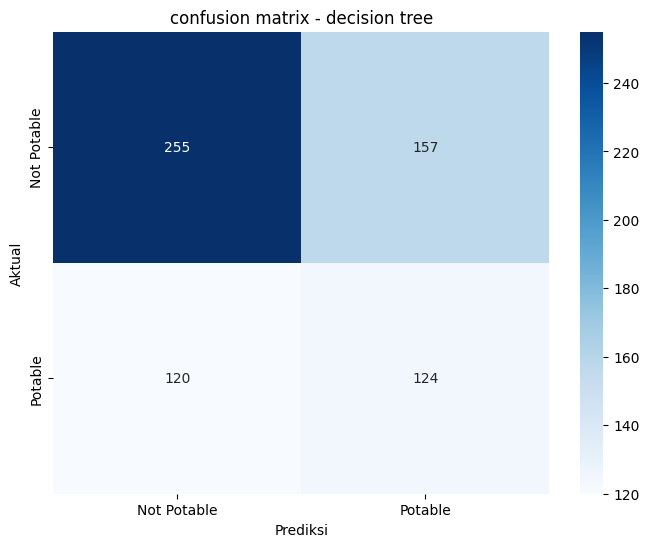

In [117]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

#membuat visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.title("confusion matrix - decision tree")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [119]:
y_pred_rf = clean_classifier_rf.predict(X_test)

#evaluate Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.678
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



In [120]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.678, 'recall': 0.678, 'F1 score': 0.657, 'Precision score': 0.666}


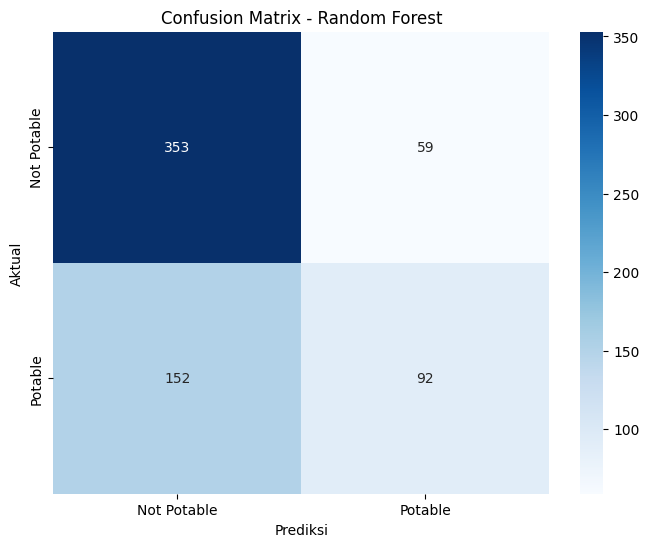

In [121]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

#membuat visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

8. evaluasi

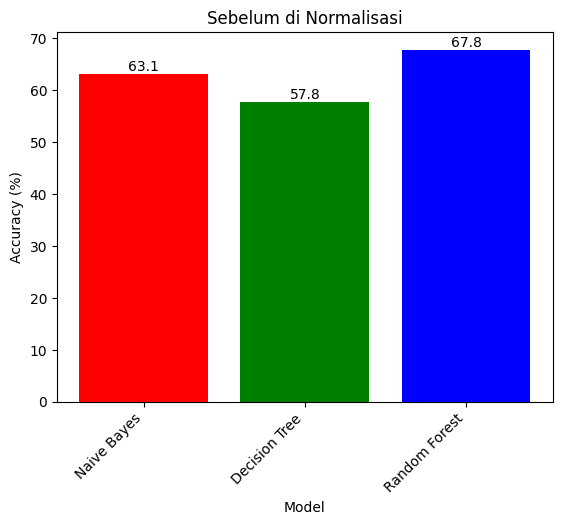

In [122]:
model_comp = pd.DataFrame({'Model': ['Naive Bayes','Decision Tree','Random Forest'], 'Accuracy': [accuracy_nb*100,
                    accuracy_dt*100,accuracy_rf*100]})

#membuat bar plot berketerangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Sebelum di Normalisasi')
plt.xticks(rotation=45, ha='right')



for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


In [123]:
from sklearn.preprocessing import StandardScaler

#inisialisasi StandardScaler
scaler = StandardScaler()

#melakukan fit dan transform pada data training
X_train_scaled = scaler.fit_transform(X_train)

#melakukan transform pada data testing (menggunakan parameter yang dipelajari dari data training)
X_test_scaled = scaler.transform(X_test)

In [124]:
#sebelum dilakukan normalisasi

#akurasi model sebelum normalisasi
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)

#setelah normalisasi

#prediksi model setelah normalisasi
y_pred_nbN = clean_classifier_nb.predict(X_test_scaled)
y_pred_dtN = clean_classifier_dt.predict(X_test_scaled)
y_pred_rfN = clean_classifier_rf.predict(X_test_scaled)

#akurasi model setelah normalisasi
accuracy_nbN = round(accuracy_score(y_test, y_pred_nbN), 3)
accuracy_dtN = round(accuracy_score(y_test, y_pred_dtN), 3)
accuracy_rfN = round(accuracy_score(y_test, y_pred_rfN), 3)

#perbandingan akurasi
#membuat DataFrame untuk perbandingan
data = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Akurasi Sebelum Normalisasi': [accuracy_nb, accuracy_dt, accuracy_rf],
    'Akurasi Setelah Normalisasi': [accuracy_nbN, accuracy_dtN, accuracy_rfN]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)


           Model  Akurasi Sebelum Normalisasi  Akurasi Setelah Normalisasi
0    Naive Bayes                        0.631                        0.372
1  Decision Tree                        0.578                        0.628
2  Random Forest                        0.678                        0.372


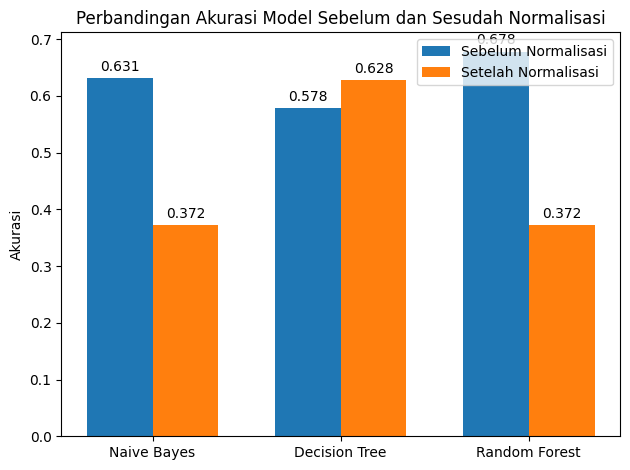

In [125]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
before_normalization = [accuracy_nb, accuracy_dt, accuracy_rf]
after_normalization = [accuracy_nbN, accuracy_dtN, accuracy_rfN]

#menentukan posisi bar
x = np.arange(len(models))
width = 0.35

#membuat bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_normalization, width, label='Sebelum Normalisasi')
rects2 = ax.bar(x + width/2, after_normalization, width, label='Setelah Normalisasi')

#menambahkan label, judul, dan legend
ax.set_ylabel('Akurasi')
ax.set_title('Perbandingan Akurasi Model Sebelum dan Sesudah Normalisasi')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

#menambahkan label nilai di atas setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

10. kesimpulan

#*Akurasi*
Algoritma	\\ Akurasi (Sebelum Normalisasi)	\\ Akurasi (Setelah Normalisasi)

**Naive Bayes** \\ 63.1% \\ 37.2%

**Decision Tree** \\ 57.8% \\ 62.8%

**Random Forest** \\ 67.8% \\ 37.2%

#*Keunggulan dan Keterbatasan*

**Naive Bayes:**

Keunggulan: Sederhana, cepat, dan cocok untuk dataset dengan dimensi tinggi.
Keterbatasan: Membutuhkan asumsi independensi antar fitur dan sensitif terhadap fitur yang tidak relevan.

**Decision Tree:**

Keunggulan: Mudah dipahami, mampu menangani data kategorikal maupun numerik.
Keterbatasan: Cenderung overfitting dan kurang stabil.

**Random Forest:**

Keunggulan: Mampu mengurangi overfitting, stabil, serta dapat menangani data hilang dan outlier.


Keterbatasan: Lebih kompleks dan membutuhkan waktu pelatihan yang lama.
Rekomendasi Algoritma

#*Rekomendasi*
**Random Forest disarankan untuk kasus ini karena:**

Akurasi Tertinggi: Mencapai akurasi hampir 68%, lebih baik dibandingkan Naive Bayes dan Decision Tree.

Robust dan Stabil: Lebih andal untuk memprediksi data baru tanpa mudah dipengaruhi oleh outlier.

Generalisasi yang Baik: Dapat digunakan pada dataset lain dengan karakteristik serupa.